### Stock Market Prediction Using  LSTM

In [ ]:
# Data Set used is Last 3 year named= AAPL19_22.csv
# Predicted next 20 days stock price

In [44]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from numpy import array

In [45]:
df=pd.read_csv('AAPL19_22.csv')

In [46]:
df.head()

Date       Open       High        Low      Close  Adj Close  \
0  2019-01-02  38.722500  39.712502  38.557499  39.480000  38.277523   
1  2019-01-03  35.994999  36.430000  35.500000  35.547501  34.464806   
2  2019-01-04  36.132500  37.137501  35.950001  37.064999  35.936081   
3  2019-01-07  37.174999  37.207500  36.474998  36.982498  35.856091   
4  2019-01-08  37.389999  37.955002  37.130001  37.687500  36.539619   

      Volume  
0  148158800  
1  365248800  
2  234428400  
3  219111200  
4  164101200

In [47]:
df1=df.reset_index()['Close']

In [48]:
df1

0       39.480000
1       35.547501
2       37.064999
3       36.982498
4       37.687500
          ...    
801    157.440002
802    162.949997
803    158.520004
804    154.729996
805    154.729996
Name: Close, Length: 806, dtype: float64

In [49]:
df2=df
df2=df2.drop(["Open","High","Low","Adj Close","Volume"],axis=1)
df2

Date       Close
0    2019-01-02   39.480000
1    2019-01-03   35.547501
2    2019-01-04   37.064999
3    2019-01-07   36.982498
4    2019-01-08   37.687500
..          ...         ...
801  2022-03-08  157.440002
802  2022-03-09  162.949997
803  2022-03-10  158.520004
804  2022-03-11  154.729996
805  2022-03-11  154.729996

[806 rows x 2 columns]

In [50]:
df2['Date']=pd.to_datetime(df2['Date'],format='%Y%m%d',errors='ignore')

In [51]:
df2.set_index('Date',inplace=True)

<AxesSubplot:xlabel='Date'>

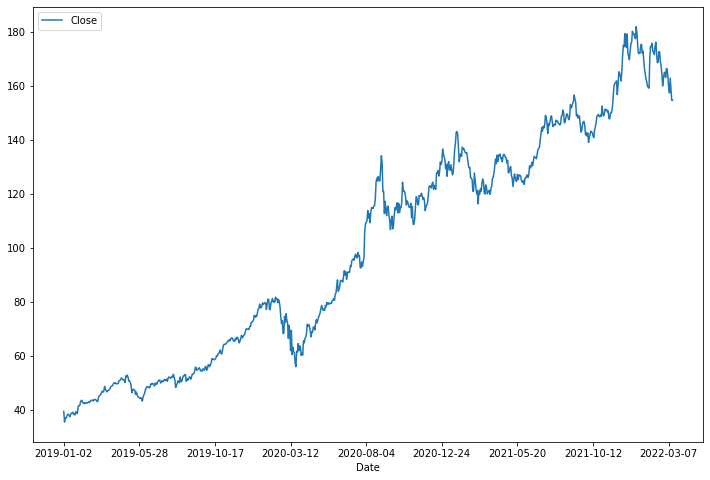

In [52]:
df2.plot(figsize=(12,8))

In [53]:
# To Normalize the data, we apply MinMax Scaler.
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [54]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [55]:
training_size,test_size

(564, 242)

In [56]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [57]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [58]:
print(X_train.shape), print(y_train.shape)

(463, 100)
(463,)


(None, None)

In [59]:
print(X_test.shape), print(ytest.shape)

(141, 100)
(141,)


(None, None)

In [60]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
## Sometimes this model is working and sometimes it is not..

model=Sequential()
model.add(LSTM(64,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64))
#model.add(Dense(32))
#model.add(Dense(16))
#model.add(Dense(2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [61]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
8/8 [==============================] - 17s 747ms/step - loss: 0.0510 - val_loss: 0.0026
Epoch 2/100
8/8 [==============================] - 3s 315ms/step - loss: 0.0078 - val_loss: 0.0344
Epoch 3/100
8/8 [==============================] - 3s 332ms/step - loss: 0.0041 - val_loss: 0.0030
Epoch 4/100
8/8 [==============================] - 3s 327ms/step - loss: 0.0028 - val_loss: 0.0062
Epoch 5/100
8/8 [==============================] - 3s 324ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 6/100
8/8 [==============================] - 2s 299ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 7/100
8/8 [==============================] - 3s 333ms/step - loss: 0.0016 - val_loss: 0.0023
Epoch 8/100
8/8 [==============================] - 3s 339ms/step - loss: 0.0015 - val_loss: 0.0026
Epoch 9/100
8/8 [==============================] - 3s 345ms/step - loss: 0.0015 - val_loss: 0.0024
Epoch 10/100
8/8 [==============================] - 3s 339ms/step - loss: 0.0015 - val_loss: 0.0034
Epoch 11

In [64]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [65]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [66]:
a=ytest.reshape(141,1)

In [67]:
a=scaler.inverse_transform(a)

In [68]:
#MAE, MSE, RMSE Error
print('Mean Absolute error: ', metrics.mean_absolute_error(a,test_predict))
print('Mean Squared Error: ', metrics.mean_squared_error(a,test_predict))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(a,test_predict)))

Mean Absolute error:  4.064961843770777
Mean Squared Error:  31.757880286101514
Root Mean Squared Error:  5.635413053725655


In [27]:
b = df['Adj Close'].tail(141)
df4 = pd.DataFrame(b)
df4['Predicted']=test_predict
df4.tail(5)

Adj Close   Predicted
801  157.440002  155.994049
802  162.949997  156.050674
803  158.520004  155.419418
804  154.729996  154.913391
805  154.729996  154.224670

In [28]:
len(test_data)

242

In [29]:
#100 less than test_data
x_input=test_data[142:].reshape(1,-1)
x_input.shape


(1, 100)

In [30]:
tmp=list(x_input)
tmp=tmp[0].tolist()

In [31]:
# demonstrate prediction for next 20 days
from numpy import array

output=[]
n_steps=100
i=0
while(i<20):
    
    if(len(tmp)>100):
        x_input=np.array(tmp[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        tmp.extend(yhat[0].tolist())
        tmp=tmp[1:]
        output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        tmp.extend(yhat[0].tolist())
        print(len(tmp))
        output.extend(yhat.tolist())
        i=i+1
    

print(output)

[0.793887]
101
1 day input [0.77789536 0.77250153 0.77216013 0.77680301 0.77359399 0.79899299
 0.78008027 0.77434504 0.78158237 0.79161907 0.78800041 0.79018522
 0.78444998 0.7869762  0.76724419 0.76690278 0.78137755 0.78144579
 0.78827347 0.80527445 0.83517965 0.8534779  0.85668692 0.85934972
 0.86296838 0.82794232 0.85136133 0.88590941 0.88229075 0.87539472
 0.86228557 0.88604599 0.92605614 0.95268418 0.94913376 0.98252114
 0.95719047 0.94756342 0.98149702 0.93343006 0.92578307 0.9162926
 0.93841434 0.95650766 0.96087738 0.98852953 0.98142868 0.98204325
 0.97398653 0.96968515 1.         0.98422806 0.95159172 0.93165489
 0.93281558 0.93295217 0.95268418 0.95575662 0.93295217 0.93896056
 0.916634   0.89225911 0.88051549 0.86617741 0.86078347 0.84822056
 0.84760608 0.84439706 0.92025267 0.95063585 0.94947516 0.95787318
 0.93779977 0.93431768 0.92933351 0.95097726 0.96087738 0.93247418
 0.90871386 0.91035254 0.93704872 0.93541014 0.91035254 0.89956479
 0.87921831 0.85020064 0.86843055 0.

In [32]:
day_new=np.arange(1,101)
day_pred=np.arange(101,121)

In [33]:
len(df1)

806

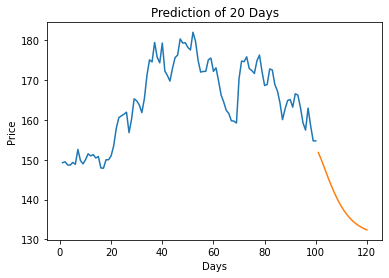

In [34]:
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Prediction of 20 Days')
plt.plot(day_new,scaler.inverse_transform(df1[706:]))
plt.plot(day_pred,scaler.inverse_transform(output))

In [35]:
# Predicted price of next 20 days
pred=scaler.inverse_transform(output)
pred

array([[151.82217378],
       [150.28498777],
       [148.61649615],
       [146.90766393],
       [145.22588549],
       [143.61609336],
       [142.10610081],
       [140.71183109],
       [139.44094899],
       [138.29567191],
       [137.27430624],
       [136.37214661],
       [135.58233135],
       [134.89628775],
       [134.30418602],
       [133.79546304],
       [133.35905809],
       [132.98388427],
       [132.65911658],
       [132.37439269]])

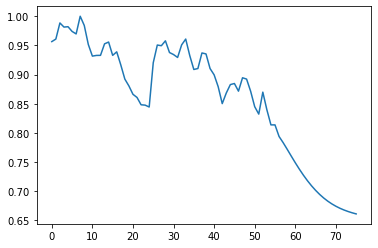

In [36]:
df3=df1.tolist()
df3.extend(output)
plt.plot(df3[750:])

In [37]:
df3=scaler.inverse_transform(df3).tolist()

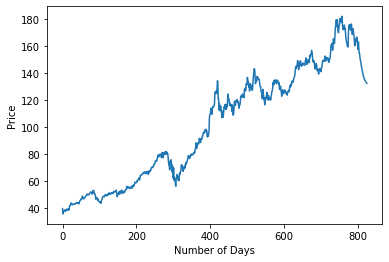

In [38]:
plt.xlabel('Number of Days')
plt.ylabel('Price')
plt.plot(df3)

In [41]:
df5 = pd.DataFrame(pred,columns=['Predicted Price'])
df5.head(10)

Predicted Price
0       151.822174
1       150.284988
2       148.616496
3       146.907664
4       145.225885
5       143.616093
6       142.106101
7       140.711831
8       139.440949
9       138.295672

In [43]:
df5.tail(10)

Predicted Price
10       137.274306
11       136.372147
12       135.582331
13       134.896288
14       134.304186
15       133.795463
16       133.359058
17       132.983884
18       132.659117
19       132.374393